# Explore Strava data

Questions:
- progress in distance
- progress in weekly distance
- progress in pace

In [1]:
import requests
import urllib3
import config
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import datetime
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)



In [2]:
auth_url = "https://www.strava.com/oauth/token"
activites_url = "https://www.strava.com/api/v3/athlete/activities"

payload = {
    'client_id': config.client_id,
    'client_secret': config.client_secret,
    'refresh_token': config.refresh_token,
    'grant_type': "refresh_token",
    'f': 'json'
}


res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']
header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 200, 'page': 1}
strava_json_data = requests.get(activites_url, headers=header, params=param).json()


In [3]:
strava_df = json_normalize(strava_json_data)

strava_df.columns

<ipython-input-3-4d2b443c12fd>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  strava_df = json_normalize(strava_json_data)


Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'sport_type', 'workout_type', 'id',
       'start_date', 'start_date_local', 'timezone', 'utc_offset',
       'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'trainer', 'commute', 'manual', 'private', 'visibility',
       'flagged', 'gear_id', 'start_latlng', 'end_latlng', 'average_speed',
       'max_speed', 'has_heartrate', 'heartrate_opt_out',
       'display_hide_heartrate_option', 'elev_high', 'elev_low', 'upload_id',
       'upload_id_str', 'external_id', 'from_accepted_tag', 'pr_count',
       'total_photo_count', 'has_kudoed', 'athlete.id',
       'athlete.resource_state', 'map.id', 'map.summary_polyline',
       'map.resource_state'],
      dtype='object')

In [104]:
# create clean data frame with running data and key variables only
feature_list = ['id', 'name', 'distance', 'moving_time', 'start_date_local', 'average_speed', 'max_speed', 'sport_type']

# select the variables and observations needed
running_data = strava_df[feature_list]
running_data = running_data[running_data["sport_type"] == 'Run']

# from seconds to minutes
# and from m/s to km/h
running_data["moving_time"] = running_data["moving_time"] / 60
running_data["average_speed"] = running_data["average_speed"] * 3.6
running_data["max_speed"] = running_data["max_speed"] * 3.6

# proper date formatting
running_data['start_date_local'] = pd.to_datetime(running_data['start_date_local'])
running_data['start_time'] = running_data['start_date_local'].dt.time
running_data['start_date_local'] = running_data['start_date_local'].dt.date
running_data['week'] = pd.to_datetime(running_data["start_date_local"]).dt.isocalendar().week

# check data from june
running_data = running_data[running_data["start_date_local"] > datetime.date(2022, 6, 1)]

running_data


,id,name,distance,moving_time,start_date_local,average_speed,max_speed,sport_type,start_time,week
0,7712238272,Alright alright alright,5022.7,31.316667,2022-08-28,9.6228,19.4184,Run,07:43:01,34
1,7701757360,Hát ez nehéz volt,4978.9,30.866667,2022-08-26,9.6768,15.0624,Run,08:32:39,34
2,7690523365,No stop run,4978.5,29.883333,2022-08-24,9.9972,13.7088,Run,08:20:45,34
3,7679193406,Ok ok ok ok,4488.6,26.766667,2022-08-22,10.0620,14.5440,Run,08:42:48,34
4,7667589440,"Esős reggel, okés fútas idő",4528.0,27.066667,2022-08-20,10.0368,16.3368,Run,08:42:41,33
5,7657135324,Ez 5k volt csak szar a Strava,4440.3,28.283333,2022-08-18,9.4212,17.2080,Run,07:53:01,33
6,7645901891,Accidental all time high,8014.8,55.900000,2022-08-16,8.6040,14.1840,Run,07:55:38,33
7,7634710140,End of vacation :(,5415.8,36.533333,2022-08-14,8.8956,12.1896,Run,08:41:33,32
8,7601515185,Huhhh,5452.6,38.750000,2022-08-08,8.4420,13.2408,Run,08:05:33,32
9,7589928483,We're back in business baby!,4512.9,29.666667,2022-08-06,9.1260,18.8352,Run,07:37:23,31


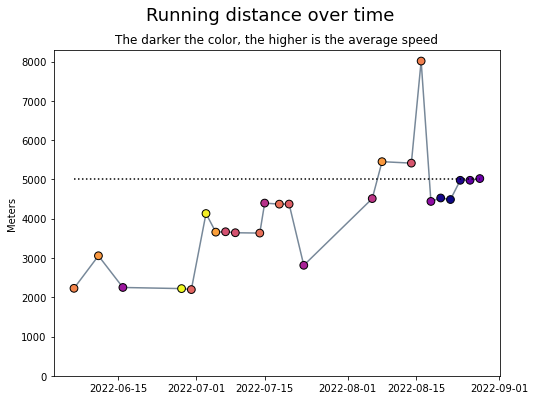

In [103]:
x = running_data["start_date_local"]
y = running_data["distance"]

plt.figure(figsize=(8,6))

plt.plot(x,y, c="#778899", zorder=1)
plt.scatter(x,y, c=running_data["average_speed"], cmap='plasma_r', zorder=2, edgecolors='k', s=60)
plt.hlines(5000, running_data.start_date_local.min(), running_data.start_date_local.max(), linestyles="dotted",colors='black')
plt.ylim(ymin=0)

plt.title('The darker the color, the higher is the average speed', fontsize=12)
plt.suptitle('Running distance over time', fontsize=18)
plt.ylabel("Meters")

plt.savefig('figures/distance.png', facecolor="white")

plt.show()

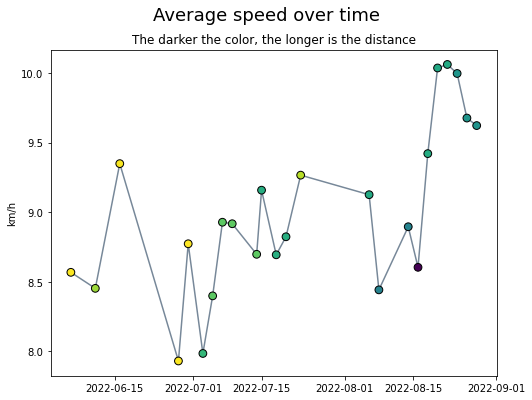

In [102]:
x = running_data["start_date_local"]
y = running_data["average_speed"]

plt.figure(figsize=(8,6))

plt.plot(x,y, c="#778899", zorder=1)
plt.scatter(x,y, c=running_data["distance"], cmap='viridis_r', zorder=2, edgecolors='k', s=60)

plt.title('The darker the color, the longer is the distance', fontsize=12)
plt.suptitle('Average speed over time', fontsize=18)
plt.ylabel("km/h")

plt.savefig('figures/speed.png', facecolor="white")

plt.show()

In [67]:
weekly_data = running_data[["week", "distance"]].groupby("week").sum()
weekly_data["count"] = running_data[["week", "distance"]].groupby("week").count()
weekly_data['week'] = weekly_data.index

weekly_data

,distance,count,week
week,,,
23,5284.1,2,23
24,2249.4,1,24
26,8548.1,3,26
27,10969.6,3,27
28,8032.3,2,28
29,11558.2,3,29
31,4512.9,1,31
32,10868.4,2,32
33,16983.1,3,33


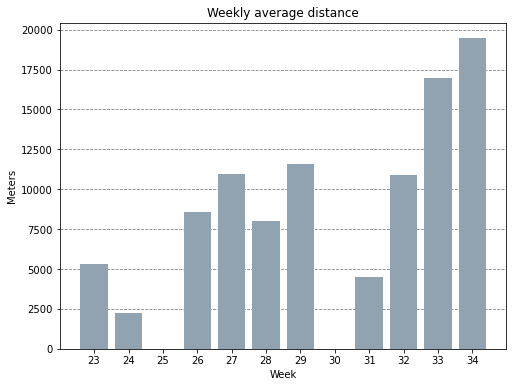

In [101]:
x = weekly_data["week"]
y = weekly_data["distance"]

plt.figure(figsize=(8,6))

plt.grid(axis='y', color='gray', linestyle='dashed', zorder=0)
plt.bar(x, y, align='center', color="#91A3B0", zorder=3)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.title("Weekly average distance")
plt.ylabel("Meters")
plt.xlabel("Week")

plt.savefig('figures/avg_dist.png', facecolor="white")

plt.show()

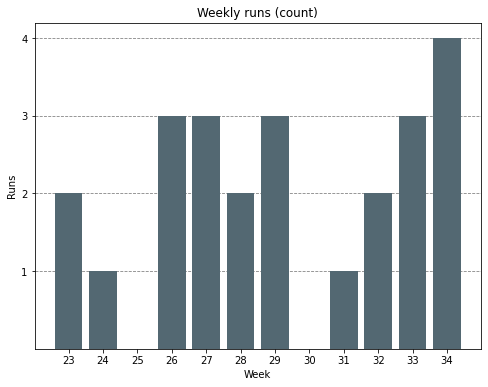

In [100]:
x = weekly_data["week"]
y = weekly_data["count"]

plt.figure(figsize=(8,6))

plt.grid(axis='y', color='gray', linestyle='dashed', zorder=0)
plt.bar(x, y, align='center', color="#536872", zorder=3)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(min(y), max(y)+1, 1.0))


plt.title("Weekly runs (count)")
plt.ylabel("Runs")
plt.xlabel("Week")

plt.savefig('figures/count.png', facecolor="white")

plt.show()